In [2]:
### found instructions here:
# https://medium.com/swlh/using-python-to-connect-to-stravas-api-and-analyse-your-activities-dummies-guide-5f49727aac86

In [1]:
import requests
import json
# Make Strava auth API call with your 
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id': 98499,
                            'client_secret': '6c0f48a5ec2ac40a9fc0dc451f91239f46998593',
                            'code': 'e3aafa4c2cc6e75e6741321ca6a2ff67d675fc71',
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()
# Save tokens to file
with open('strava_tokens.json', 'w') as outfile:
    json.dump(strava_tokens, outfile)
# Open JSON file and print the file contents 
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

{'token_type': 'Bearer', 'expires_at': 1676024307, 'expires_in': 21600, 'refresh_token': '1c54e1be2d6267e6a53199d9aff50091e1f2dd5b', 'access_token': 'b07c114389af23ab559243b66d24fcaacdd96f8b', 'athlete': {'id': 2701262, 'username': 'matthew_zabriskie', 'resource_state': 2, 'firstname': 'Matt', 'lastname': 'Zabriskie', 'bio': '', 'city': 'Salt Lake City', 'state': 'UT', 'country': 'United States', 'sex': 'M', 'premium': True, 'summit': True, 'created_at': '2013-07-31T18:36:25Z', 'updated_at': '2023-02-07T04:41:52Z', 'badge_type_id': 1, 'weight': 74.8426, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/2701262/4193817/5/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/2701262/4193817/5/large.jpg', 'friend': None, 'follower': None}}


In [9]:
import requests
from pandas.io.json import json_normalize
import json
import csv
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
# Loop through all activities
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Get first page of activities from Strava with all fields
r = requests.get(url + '?access_token=' + access_token)
print(r.json())
    
# df = json_normalize(r)
# df.head()


[{'resource_state': 2, 'athlete': {'id': 2701262, 'resource_state': 1}, 'name': 'Morning Trail Run', 'distance': 13486.7, 'moving_time': 4853, 'elapsed_time': 4913, 'total_elevation_gain': 491.0, 'type': 'Run', 'sport_type': 'TrailRun', 'workout_type': 0, 'id': 8532189545, 'start_date': '2023-02-09T13:06:40Z', 'start_date_local': '2023-02-09T06:06:40Z', 'timezone': '(GMT-07:00) America/Denver', 'utc_offset': -25200.0, 'location_city': None, 'location_state': None, 'location_country': 'United States', 'achievement_count': 0, 'kudos_count': 7, 'comment_count': 0, 'athlete_count': 1, 'photo_count': 0, 'map': {'id': 'a8532189545', 'summary_polyline': 'wddxFz{~iT|@Xx@`Az@d@rFdBdCHxAfAp@D`D]jCu@~DCjAgAvBu@nJK~@VxBlBtBxAdAXn@Ef@ZhB^v@^|@Cp@a@`AeChBuAz@wA`CmBT]R{AtB_HE[q@iAMw@ZwDAmAV@vA`A\\B^y@|@aAdByCfA?~Ak@|AV\\_@`@eCjAA\\Iv@}@b@oBf@NJKHmB]eCHSf@c@Zu@NgACe@k@m@}A{@oA@UK_AeBE{@LaBRe@|@a@Pa@CIuDy@u@k@BIn@Ex@s@b@qBIe@w@g@m@cAIa@Hi@LC^\\`@AxCgAVi@ZuBl@kBXnA\\j@d@rBd@Bt@SzAw@jAJd@\\x@~B~Ax@`APt@?

In [10]:
with open('strava_data.json', 'w', encoding='utf-8') as f:
    json.dump(r.json(), f, ensure_ascii=False, indent=4)

In [12]:
import pandas as pd
# Loop through all activities
page = 1
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Create the dataframe ready for the API call to store your activity data

while True:
    
    # get page of activities from Strava
    r = requests.get(url + '?access_token=' + access_token + '&per_page=200' + '&page=' + str(page))
    with open('strava_data.json', 'a', encoding='utf-8') as f:
        json.dump(r.json(), f, ensure_ascii=False, indent=4)
    
    # if no results then exit loop
    if (not r):
        break
    

    # increment page
    page += 1

In [7]:
df.to_csv('strava_activities_all_fields.csv')

In [8]:
df.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.sum

In [ ]:
columns = ['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state']
       

In [9]:
import pandas as pd
# Loop through all activities
page = 1
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Create the dataframe ready for the API call to store your activity data
activities = pd.DataFrame(columns = columns)

while True:
    
    # get page of activities from Strava
    r = requests.get(url + '?access_token=' + access_token + '&per_page=200' + '&page=' + str(page))
    r = r.json()
    
    # if no results then exit loop
    if (not r):
        break
    

    # otherwise add new data to dataframe
    for x in range(len(r)):
        activities.loc[x + (page-1)*200,'id'] = r[x]['id']
        activities.loc[x + (page-1)*200,'name'] = r[x]['name']
        activities.loc[x + (page-1)*200,'start_date_local'] = r[x]['start_date_local']
        activities.loc[x + (page-1)*200,'type'] = r[x]['type']
        activities.loc[x + (page-1)*200,'distance'] = r[x]['distance']
        activities.loc[x + (page-1)*200,'moving_time'] = r[x]['moving_time']
        activities.loc[x + (page-1)*200,'elapsed_time'] = r[x]['elapsed_time']
        activities.loc[x + (page-1)*200,'total_elevation_gain'] = r[x]['total_elevation_gain']
        activities.loc[x + (page-1)*200,'end_latlng'] = r[x]['end_latlng']
        try:
            activities.loc[x + (page-1)*200,'average_heartrate'] = r[x]['average_heartrate']
        except:
            next
        try:
            activities.loc[x + (page-1)*200,'average_cadence'] = r[x]['average_cadence']
        except:
            next
        try:
            activities.loc[x + (page-1)*200,'elev_high'] = r[x]['elev_high']
        except:
            next
        try:
            activities.loc[x + (page-1)*200,'elev_low'] = r[x]['elev_low']
        except:
            next
        try:
            activities.loc[x + (page-1)*200,'gear_id'] = r[x]['gear_id']
        except:
            next

    # increment page
    page += 1

# Export your activities file as a csv 
# to the folder you're running this script in
# activities.to_csv('strava_activities.csv')

In [10]:
activities.to_csv('all_activites.csv')
activities.to_json('activities.json')

In [11]:
# create run-only df
run_df = activities[activities['type'] == 'Run']
# convert distance to miles
run_df['distance_miles'] = run_df['distance']*3.25/5280
# convert moving_time to minutes
run_df['moving_time_min'] = run_df['moving_time']/60
# convert elapsed_time to minutes
run_df['elapsed_time_min'] = run_df['elapsed_time']/60
# convert elevation values to feet
run_df['total_elevation_gain_ft'] = run_df['total_elevation_gain']*3.25
run_df['elev_high_ft'] = run_df['elev_high']*3.25
run_df['elev_low_ft'] = run_df['elev_low']*3.25


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [12]:
# making elevation gain/mile column
run_df['gain_per_mile'] = run_df['total_elevation_gain_ft']/run_df['distance_miles']
#making min/mile column
run_df['avg_pace'] = run_df['elapsed_time_min']/run_df['distance_miles']

run_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,name,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,end_latlng,average_heartrate,...,elev_low,gear_id,distance_miles,moving_time_min,elapsed_time_min,total_elevation_gain_ft,elev_high_ft,elev_low_ft,gain_per_mile,avg_pace
0,8517792446,Treadmill,2023-02-06T15:35:19Z,Run,10242.8,3008,3008,0,[],130.9,...,1332.8,g9558973,6.304754,50.133333,50.133333,0.0,4345.25,4331.6,0.0,7.951672
2,8512549835,Treadmill,2023-02-05T15:12:59Z,Run,6463.8,2187,2187,0,[],116.8,...,NaN,g9558973,3.978665,36.45,36.45,0.0,NaN,NaN,0.0,9.161365
3,8501636441,RUFA,2023-02-03T19:00:02Z,Run,33364.4,18363,19339,2515.0,"[40.6977161206305, -111.74283963628113]",142.7,...,1743.4,g12058101,20.536799,306.05,322.316667,8173.75,8166.6,5666.05,398.005059,15.694591
4,8493247174,Morning Trail Run,2023-02-02T06:26:07Z,Run,13803.4,5107,5345,485.0,"[40.77960739843547, -111.88554346561432]",134.9,...,1358.2,g12058101,8.496411,85.116667,89.083333,1576.25,5754.45,4414.15,185.51951,10.484819
5,8484734167,Afternoon Trail Run,2023-01-31T14:13:57Z,Run,11808.9,5443,5602,586.0,"[40.7540968246758, -111.82563548907638]",124.3,...,1472.8,g12058101,7.268736,90.716667,93.366667,1904.5,6261.45,4786.6,262.01255,12.844966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,71444482,"02/09/2013 Salt Lake City, UT",2013-02-09T16:09:50Z,Run,6528.2,2082,2245,123.2,"[40.773366, -111.871489]",NaN,...,1356.1,None,4.018305,34.7,37.416667,400.4,4807.4,4407.325,99.644006,9.311555
3037,71444492,"02/07/2013 Salt Lake City, UT",2013-02-07T16:11:28Z,Run,11160.8,4653,4751,317.5,"[40.771899, -111.833911]",NaN,...,1515.2,None,6.869811,77.55,79.183333,1031.875,5470.4,4924.4,150.204286,11.526276
3038,71444496,"02/05/2013 Salt Lake City, UT",2013-02-05T16:24:48Z,Run,9060.7,3770,3888,233.6,"[40.771927, -111.833945]",NaN,...,1516.6,None,5.577135,62.833333,64.8,759.2,5469.75,4928.95,136.127231,11.618868
3039,71444500,"02/03/2013 Salt Lake City, UT",2013-02-03T13:02:46Z,Run,7635.0,2281,2415,69.2,"[40.738919, -111.848747]",NaN,...,1342.2,None,4.699574,38.016667,40.25,224.9,4495.4,4362.15,47.855403,8.564606


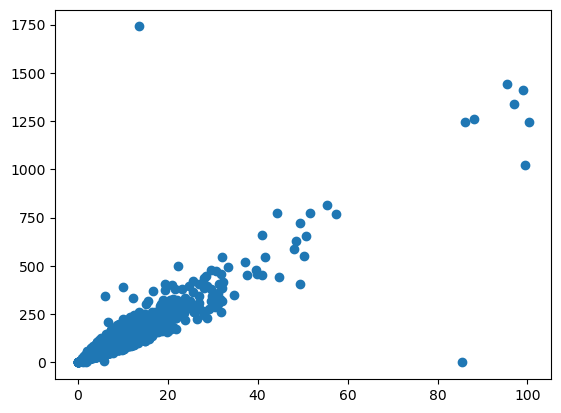

In [13]:
import matplotlib.pyplot as plt

plt.scatter(run_df['distance_miles'], run_df['moving_time_min'])

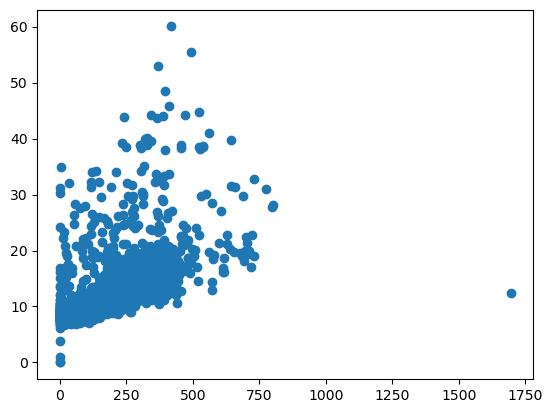

In [14]:
run_df_filtered = run_df[run_df['gain_per_mile'] < 2000]
plt.scatter(run_df_filtered['gain_per_mile'], run_df_filtered['avg_pace'])

(array([391., 678., 657., 369., 239.,  55.,  18.,  14.,  13.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.0, 84.81522895246407, 169.63045790492814, 254.44568685739222,
        339.2609158098563, 424.0761447623203, 508.89137371478444,
        593.7066026672485, 678.5218316197125, 763.3370605721766,
        848.1522895246407, 932.9675184771047, 1017.7827474295689,
        1102.5979763820328, 1187.413205334497, 1272.228434286961,
        1357.043663239425, 1441.8588921918893, 1526.6741211443532,
        1611.4893500968174, 1696.3045790492813], dtype=object),
 <BarContainer object of 20 artists>)

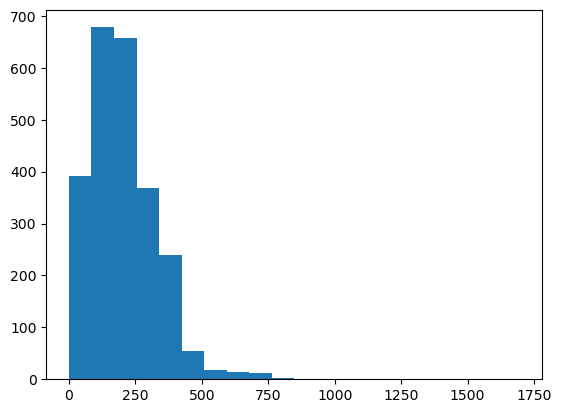

In [15]:
plt.hist(run_df_filtered['gain_per_mile'], bins=20)

In [16]:
run_df['distance_miles'].max()

100.27234848484848

In [17]:
run_df[run_df['elapsed_time_min'] == 0]

,id,name,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,end_latlng,average_heartrate,...,elev_low,gear_id,distance_miles,moving_time_min,elapsed_time_min,total_elevation_gain_ft,elev_high_ft,elev_low_ft,gain_per_mile,avg_pace
2769,190877116,Wasatch Front 100 - the part Fenix missed,2014-09-06T00:00:00Z,Run,138886.0,0,0,0,[],NaN,...,NaN,g445824,85.488542,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [18]:
run_df.loc[2748,:]['moving_time_min'] = 1
run_df.loc[2748,:]['elapsed_time_min'] = 1
